In [1]:
import matplotlib.pyplot as plt; from matplotlib.gridspec import GridSpec
import ast; import os

def get_data(v):
    file = open(os.getcwd()+f"\Instances\{v}.txt","r")
    v = file.read()
    v = ast.literal_eval(v)
    file.close()
    return v
print(os.getcwd())

M = [5,10,15]; S= [1,10,15,25]; q_dist = [[1,15],[6,20],[11,25]]; num_episodes = 20; keys = ["st","myo"]
inst = {}
for m in M:
    for s in S:
        for q in q_dist:
            try:
                inst[(m,s,tuple(q))] = get_data((m,s,tuple(q)))[(m,s,tuple(q))]
            except:
                continue

c:\Users\juan_\OneDrive - Universidad de los Andes\Documentos\SD-IB-IRP-PP\Environment


In [2]:

def axis_lims(q_dist):
    
    def get_list(ind, ref_p):
        lista = [inst[(m,s,tuple(q_dist))][ind][ep][alg] for m in M for s in S for ep in range(num_episodes) for alg in keys]
        ub = (int(max(lista)/ref_p)+1)*ref_p
        if ind < 4:
            lb = (int(min(lista)/ref_p)-1)*ref_p
        else:
            lb = 0
        
        return lb,ub

    lb_cost, ub_cost = get_list(1, 50e3)
    lb_runt, ub_runt = get_list(2, 25)
    lb_serv, ub_serv = get_list(3, 0.05)
    lb_per, ub_per = get_list(4, 10)

    return (lb_cost,ub_cost), (lb_runt,ub_runt), (lb_serv,ub_serv), (lb_per,ub_per)

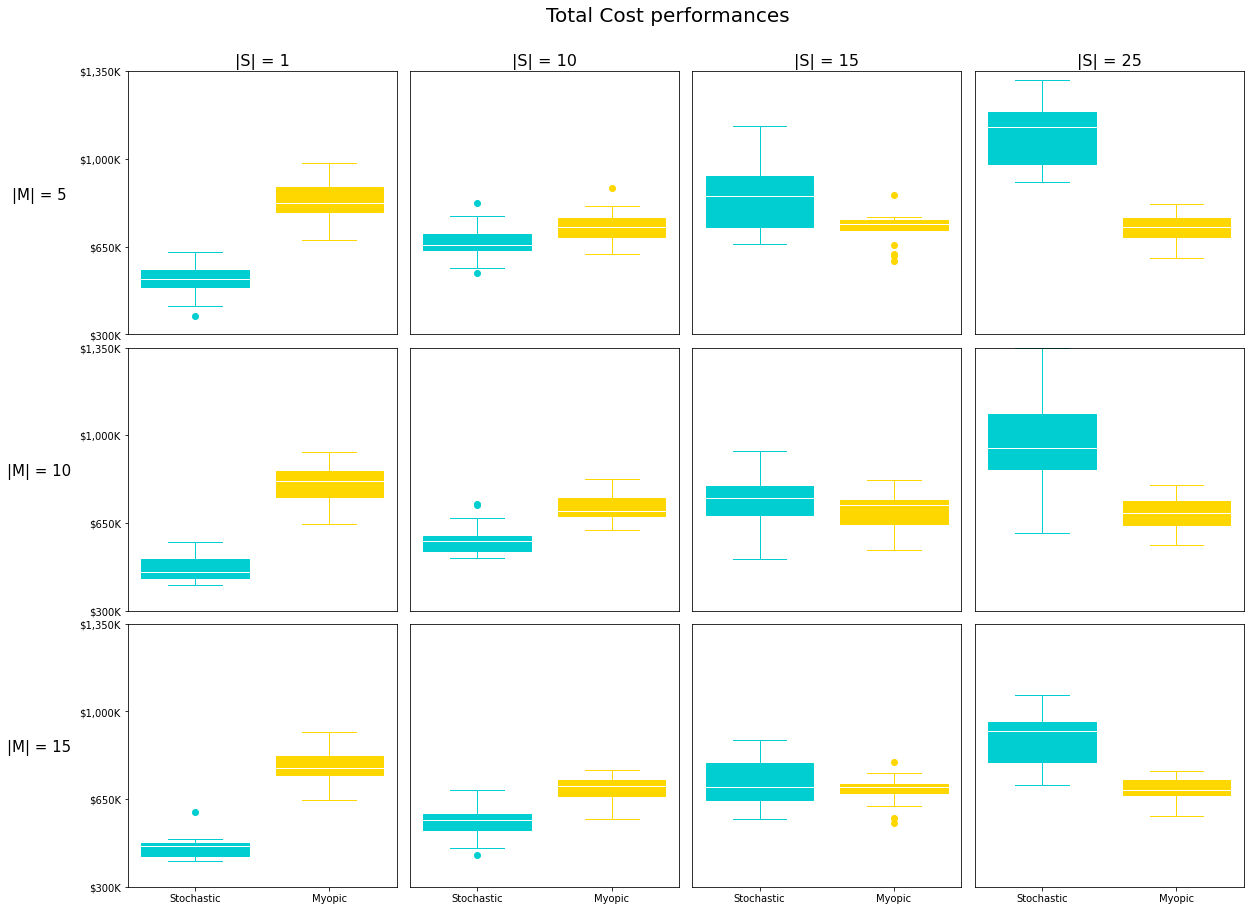

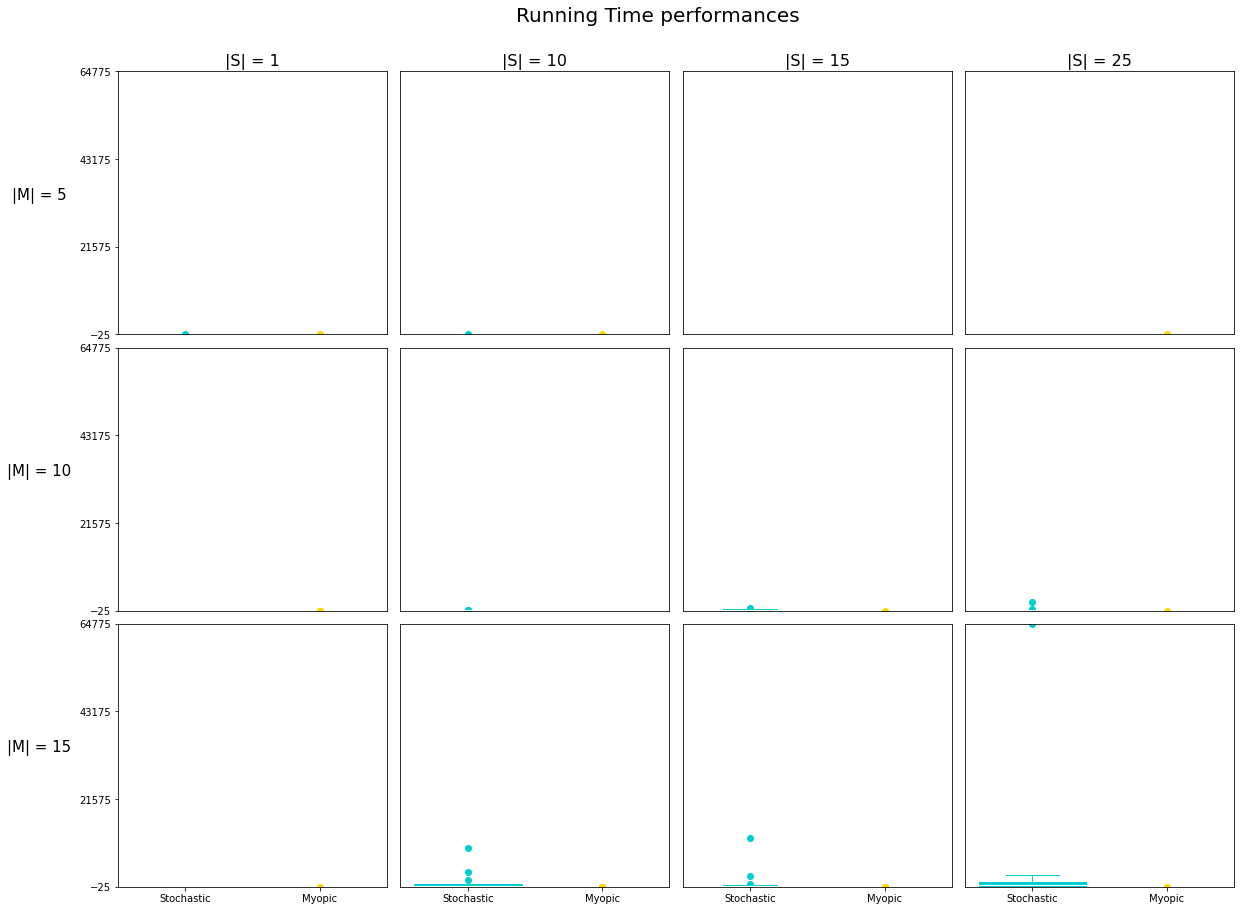

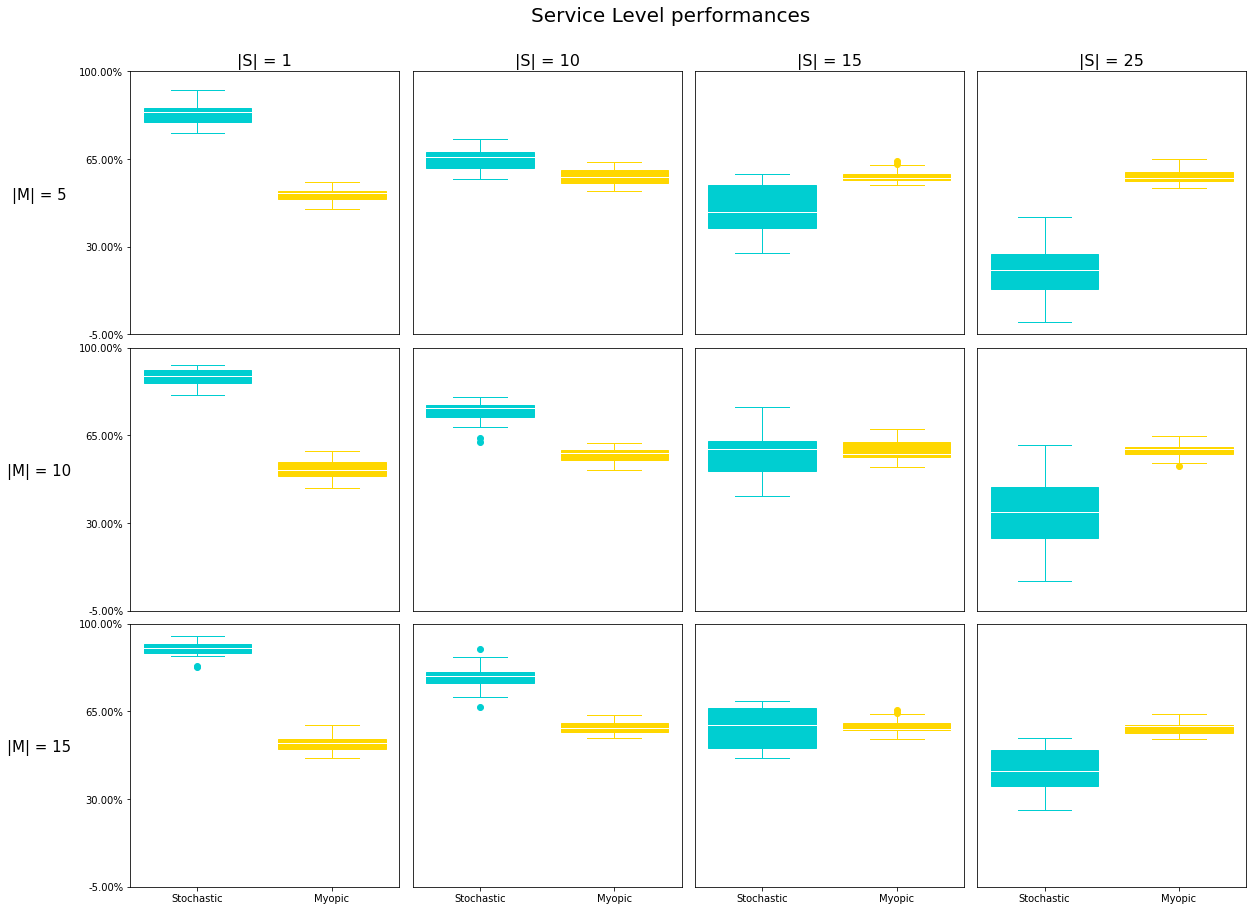

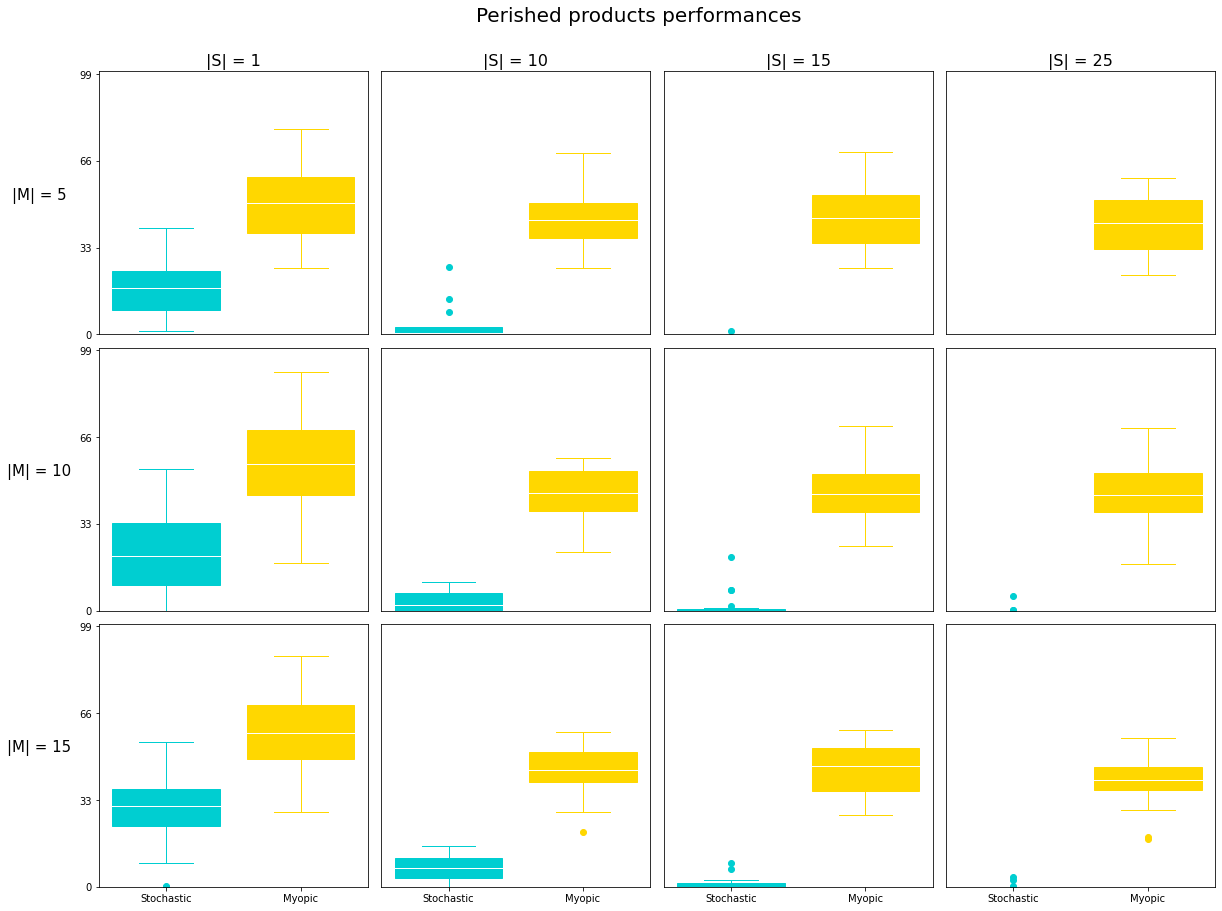

In [3]:


q_dist = [[1,15]]
for q in q_dist:
    for ind in range(1,5):
        max_vals = axis_lims(q)

        fig = plt.figure(figsize=(5*len(S),5*len(M)))
        if ind == 1:
            fig.suptitle("Total Cost performances",fontsize=20,y=0.94)
        elif ind == 2:
            fig.suptitle("Running Time performances",fontsize=20,y=0.94)
        elif ind == 3:
            fig.suptitle("Service Level performances",fontsize=20,y=0.94)
        else:
            fig.suptitle("Perished products performances",fontsize=20,y=0.94)  
        gs = GridSpec(len(M), len(S), figure=fig, wspace=0.05, hspace=0.05, width_ratios=[1 for i in range(len(S))])

        ax = {}
        lb,ub = max_vals[ind-1]
        if ind != 3:
            ticks = [i for i in range(int(lb),int(ub+10),int((ub-lb)/3))]
        else:
            ticks = [i/100 for i in range(int(lb*100),int(ub*100+10),int(100*(ub-lb)/3))]
        cols = ["darkturquoise","gold"]
        flierprops = {keys[0]:{"marker":"o", "markeredgecolor":cols[0] ,"markerfacecolor":cols[0]}, keys[1]:{"marker":"o","markeredgecolor":cols[1] , "markerfacecolor":cols[1]}}
        for m in range(len(M)):
            for s in range(len(S)):
                
                ax[m,s] = fig.add_subplot(gs[m,s])
                ax[m,s].set_ylim(lb,ub)
                ax[m,s].set_xlim(-0.5,1.5)
                ax[m,s].set_yticks([])
                
                
                box1 = ax[m,s].boxplot([inst[(M[m],S[s],tuple(q))][ind][ep][keys[0]] for ep in range(num_episodes)],positions=[0],widths=[0.8],flierprops=flierprops[keys[0]],patch_artist=True)
                box2 = ax[m,s].boxplot([inst[(M[m],S[s],tuple(q))][ind][ep][keys[1]] for ep in range(num_episodes)],positions=[1],widths=[0.8],flierprops=flierprops[keys[1]],patch_artist=True)
                j = 0
                for boxi in [box1,box2]:
                    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
                        if item != 'medians':
                            plt.setp(boxi[item], color=cols[j])
                        else:
                            plt.setp(boxi[item], color="white")
                    j += 1


                if m == 0:
                    ax[m,s].set_title(f"|S| = {S[s]}", fontsize=16)


                if m == len(M)-1:
                    ax[m,s].set_xticks([0,1])
                    ax[m,s].set_xticklabels(["Stochastic", "Myopic"])
                else:
                    ax[m,s].set_xticks([])

            ax[m,0].set_ylabel(f"|M| = {M[m]}",fontsize=15,rotation=0, labelpad=40)
            ax[m,0].set_yticks(ticks)
            if ind == 1:
                ax[m,0].set_yticklabels(["${:,.0f}K".format(int(i/1e3)) for i in ticks])
            elif ind == 3:
                ax[m,0].set_yticklabels(["{:,.2%}".format(i) for i in ticks])

            

In [4]:
max_vals = axis_lims(q_dist[0])
lb, ub = max_vals[0]
print(lb, ub)


300000.0 1350000.0


In [5]:
range(len(M))[-1]


2